In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
columns = ["MPG", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin"]

df = pd.read_csv(url, names = columns, na_values = "?", comment = "\t", sep = " ", skipinitialspace = True)

In [125]:
df = df.dropna()

In [126]:
df.head(5)

,MPG,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [137]:
X = df["acceleration"].to_numpy()
y = df["weight"].to_numpy()

In [128]:
# y = mx + b

def predict(w, x, b):
    return w * x + b

In [129]:
def mse(x, y, w, b):
    n = x.shape[0]
    total = np.sum((y - (w * x + b)) ** 2)
    return total / n

In [130]:
def gradient_descent(x, y, w, b, lr):
    dw = 0
    db = 0
    n = x.shape[0]
    for i in range(n):
        dw += -2 * x[i] * (y[i] - (w * x[i] + b))
        db += -2 * (y[i] - (w * x[i] + b))
    w -= (dw / n) * lr
    b -= (db / n) * lr
    return w, b

In [131]:
def train(x, y, w, b, lr, iterations):
    history = []
    for i in range(iterations):
        w, b = gradient_descent(x, y, w, b, lr)
        cost = mse(x, y, w, b)
        history.append(cost)
        if i % 10 == 0:
            print(f"{i}\t{w}\t{b}\t{cost}")
    return history, w, b

In [176]:
print("index\tw\t\t\tb\t\t\tcost")
history, w, b = train(X, y, 1.0, 0.0, 1e-2, 50)

index	w			b			cost
0	902.0431989795918	59.24085714285715	131878233.35486662
10	759654815.5666552	47395896.16991393	1.448850647709026e+20
20	800322906412613.5	49933198749979.84	1.6081321260241988e+32
30	8.431683607202441e+20	5.2606382996339425e+19	1.7849244425851218e+44
40	8.883075553922653e+26	5.542267672092144e+25	1.9811526765617683e+56


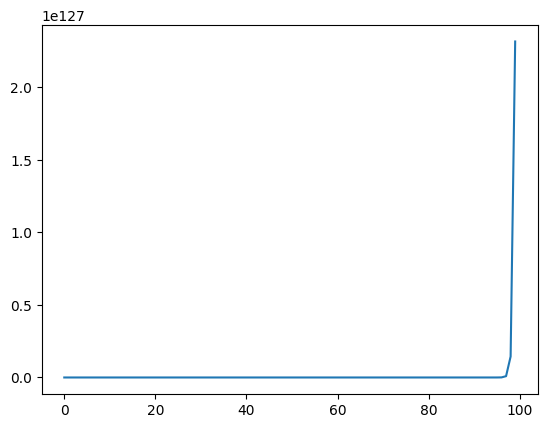

In [175]:
plt.plot(history)